<a href="https://colab.research.google.com/github/Avrajit-718/FAULT-HEALING-GRID/blob/main/Power_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

   LineBreak       1.00      1.00      1.00       104
      Normal       1.00      1.00      1.00       593
 Overheating       1.00      1.00      1.00        46
    Overload       1.00      1.00      1.00       151
ShortCircuit       1.00      1.00      1.00       106

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[104   0   0   0   0]
 [  0 593   0   0   0]
 [  0   0  46   0   0]
 [  0   0   0 151   0]
 [  0   0   0   0 106]]


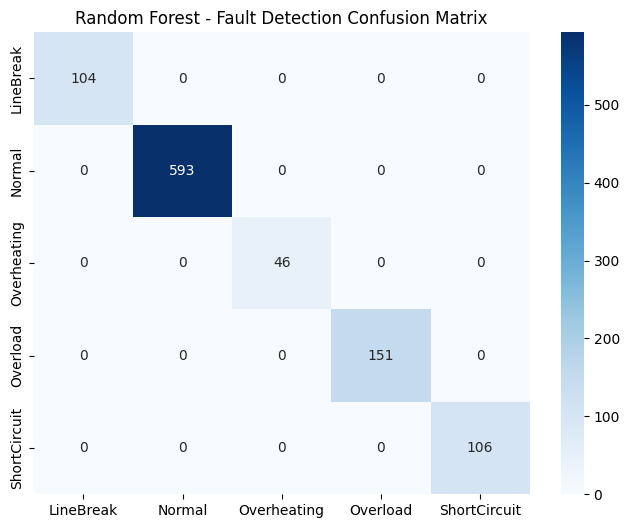

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4260 - val_loss: 0.1805
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1110 - val_loss: 0.0112
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5337e-04 - val_loss: 7.0153e-04
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5599e-04 - val_loss: 6.9517e-04
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7950e-04 - val_loss: 6.8463e-04
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5790e-04 - val_loss: 6.8147e-04
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6505e-04 - val_loss: 6.7523e-04
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.4144e-04 - val_loss: 6.7789e-04
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3368e-04 - val_loss: 6.7505e-04
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4100e-04 - val_loss: 6.6296e-04
Epoch 12/3

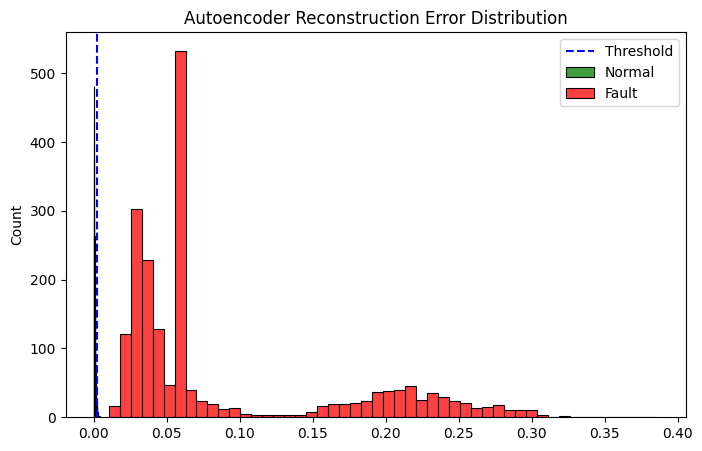

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0253 - val_loss: 0.0214
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.0601e-04 - val_loss: 0.2582
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8309e-04 - val_loss: 0.0579
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.5194e-04 - val_loss: 0.0311
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.5749e-04 - val_loss: 0.0455
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.6323e-04 - val_loss: 0.0316
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4321e-04 - val_loss: 0.0289
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.4372e-04 - val_loss: 0.0356
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.5246e-04 - val_loss: 0.0267
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.5282e-04 - val_loss: 0.0279
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.4804e-04 - val_loss: 0.0243
Epoch 12/20
50/50 ━━━━━

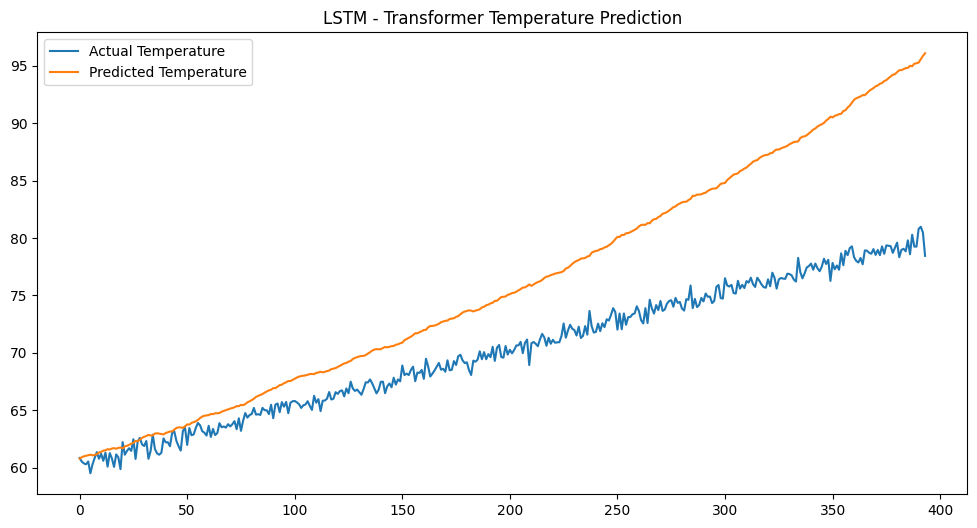

In [ ]:

!pip install scikit-learn pandas matplotlib seaborn tensorflow

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

# ======================================
# DATA GENERATION (Synthetic Grid Data)
# ======================================
n_samples = 5000
start_time = datetime(2025, 9, 1, 10, 0, 0)
data = []
fault_types = ["Normal", "Overload", "ShortCircuit", "LineBreak", "Overheating"]

for i in range(n_samples):
    timestamp = start_time + timedelta(seconds=i)
    fault = random.choices(fault_types, weights=[0.6, 0.15, 0.1, 0.1, 0.05])[0]
    if fault == "Normal":
        voltage = np.random.normal(230, 5)
        current = np.random.normal(10, 2)
        frequency = np.random.normal(50, 0.2)
        pf = np.random.normal(0.98, 0.01)
        temp = np.random.normal(40, 5)
        vib = np.random.normal(0.01, 0.005)
    elif fault == "Overload":
        voltage = np.random.normal(200, 10)
        current = np.random.normal(30, 5)
        frequency = np.random.normal(49.5, 0.3)
        pf = np.random.normal(0.8, 0.05)
        temp = np.random.normal(70, 5)
        vib = np.random.normal(0.05, 0.01)
    elif fault == "ShortCircuit":
        voltage = np.random.normal(100, 20)
        current = np.random.normal(60, 10)
        frequency = np.random.normal(48, 0.5)
        pf = np.random.normal(0.5, 0.1)
        temp = np.random.normal(80, 10)
        vib = np.random.normal(0.3, 0.05)
    elif fault == "LineBreak":
        voltage = 0
        current = 0
        frequency = 0
        pf = 0
        temp = np.random.normal(35, 3)
        vib = 0
    elif fault == "Overheating":
        voltage = np.random.normal(220, 10)
        current = np.random.normal(15, 3)
        frequency = np.random.normal(49.7, 0.2)
        pf = np.random.normal(0.9, 0.03)
        temp = np.random.normal(100, 10)
        vib = np.random.normal(0.02, 0.01)
    data.append([timestamp, voltage, current, frequency, pf, temp, vib, fault])

df = pd.DataFrame(data, columns=["Timestamp", "Voltage", "Current", "Frequency", "Power_Factor", "Temperature", "Vibration", "Fault_Label"])

# ======================================
# MODEL 1: RANDOM FOREST CLASSIFIER
# ======================================
X = df[["Voltage", "Current", "Frequency", "Power_Factor", "Temperature", "Vibration"]]
y = df["Fault_Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Random Forest - Fault Detection Confusion Matrix")
plt.show()

# ======================================
# MODEL 2: AUTOENCODER (ANOMALY DETECTION)
# ======================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_normal = X_scaled[y == "Normal"]
X_faulty = X_scaled[y != "Normal"]

auto_model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(12, activation="relu"),
    Dense(6, activation="relu"),
    Dense(12, activation="relu"),
    Dense(X.shape[1], activation="linear")
])
auto_model.compile(optimizer="adam", loss="mse")
auto_model.fit(X_normal, X_normal, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

reconstructions = auto_model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)
threshold = np.mean(mse[y == "Normal"]) + 3*np.std(mse[y == "Normal"])

y_pred_auto = ["Normal" if e < threshold else "Fault" for e in mse]
y_binary = ["Normal" if label=="Normal" else "Fault" for label in y]

print("=== Autoencoder Anomaly Detection Report ===")
print(classification_report(y_binary, y_pred_auto))
print("Confusion Matrix:\n", confusion_matrix(y_binary, y_pred_auto))

plt.figure(figsize=(8,5))
sns.histplot(mse[y == "Normal"], bins=50, color="green", label="Normal")
sns.histplot(mse[y != "Normal"], bins=50, color="red", label="Fault")
plt.axvline(threshold, color="blue", linestyle="--", label="Threshold")
plt.legend()
plt.title("Autoencoder Reconstruction Error Distribution")
plt.show()

# ======================================
# MODEL 3: LSTM (PREDICTIVE MAINTENANCE)
# ======================================
time_steps = 2000
time = np.arange(time_steps)
temperature = 40 + 0.01*time + np.random.normal(0, 0.5, time_steps)
temperature[1500:] += np.linspace(0, 20, time_steps-1500)

df_time = pd.DataFrame({"Temperature": temperature})

scaler_time = MinMaxScaler()
scaled_data = scaler_time.fit_transform(df_time)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_seq, y_seq = create_sequences(scaled_data, seq_length)
train_size = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:train_size], X_seq[train_size:]
y_train_seq, y_test_seq = y_seq[:train_size], y_seq[train_size:]

lstm_model = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(50, activation="relu"),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

y_pred_seq = lstm_model.predict(X_test_seq)
y_pred_rescaled = scaler_time.inverse_transform(y_pred_seq)
y_test_rescaled = scaler_time.inverse_transform(y_test_seq)

plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual Temperature")
plt.plot(y_pred_rescaled, label="Predicted Temperature")
plt.legend()
plt.title("LSTM - Transformer Temperature Prediction")
plt.show()